<a href="https://colab.research.google.com/github/pawara101/Algorithms/blob/main/dataset-check/PVELAD_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

In [2]:
#collapse-output
import gdown

url = 'https://drive.google.com/file/d/1EtteKnLhSFQ3XMCRXt5wKY-lDkIP7299/view?usp=drive_link'
output_path = 'pve-lad.rar'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1EtteKnLhSFQ3XMCRXt5wKY-lDkIP7299
From (redirected): https://drive.google.com/uc?id=1EtteKnLhSFQ3XMCRXt5wKY-lDkIP7299&confirm=t&uuid=cccde784-2429-4262-a103-3fbb17c8b7d3
To: /content/pve-lad.rar
100%|██████████| 4.21G/4.21G [00:55<00:00, 75.6MB/s]


'pve-lad.rar'

In [ ]:
!unrar x /content/pve-lad.rar

In [4]:
import os, pathlib

In [6]:
train_val_path = "/content/solar_cell_EL_image/PVELAD/EL2021/trainval"
test_path = "/content/solar_cell_EL_image/PVELAD/EL2021/test"
for dirpath, dirname, filename in os.walk(train_val_path):
  print(f"There are {len(dirname)} directories and {len(filename)} files in {dirpath}")

print("==============")
for dirpath, dirname, filename in os.walk(test_path):
  print(f"There are {len(dirname)} directories and {len(filename)} files in {dirpath}")

There are 2 directories and 0 files in /content/solar_cell_EL_image/PVELAD/EL2021/trainval
There are 0 directories and 4500 files in /content/solar_cell_EL_image/PVELAD/EL2021/trainval/Annotations
There are 0 directories and 4500 files in /content/solar_cell_EL_image/PVELAD/EL2021/trainval/JPEGImages
There are 2 directories and 0 files in /content/solar_cell_EL_image/PVELAD/EL2021/test
There are 0 directories and 0 files in /content/solar_cell_EL_image/PVELAD/EL2021/test/Annotations
There are 0 directories and 19150 files in /content/solar_cell_EL_image/PVELAD/EL2021/test/JPEGImages


In [10]:
## walk down in annotations
train_val_annotations_path  = "/content/solar_cell_EL_image/PVELAD/EL2021/trainval/Annotations"
train_val_img_path = "/content/solar_cell_EL_image/PVELAD/EL2021/trainval/JPEGImages"
files_list = [f for f in os.listdir(train_val_annotations_path) if os.path.isfile(os.path.join(train_val_annotations_path, f))]
image_list = [f for f in os.listdir(train_val_img_path) if os.path.isfile(os.path.join(train_val_img_path, f))]

/content/solar_cell_EL_image/PVELAD/EL2021/trainval/JPEGImages/img002562.jpg
/content/solar_cell_EL_image/PVELAD/EL2021/trainval/Annotations/img002562.xml
<annotation>
	<folder>img_save</folder>
	<filename>img002562.jpg</filename>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1024</width>
		<height>1024</height>
		<depth>1</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>thick_line</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>484</xmin>
			<ymin>170</ymin>
			<xmax>620</xmax>
			<ymax>293</ymax>
		</bndbox>
	</object>
	<object>
		<name>finger</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>814</xmin>
			<ymin>653</ymin>
			<xmax>830</xmax>
			<ymax>864</ymax>
		</bndbox>
	</object>
</annotation>

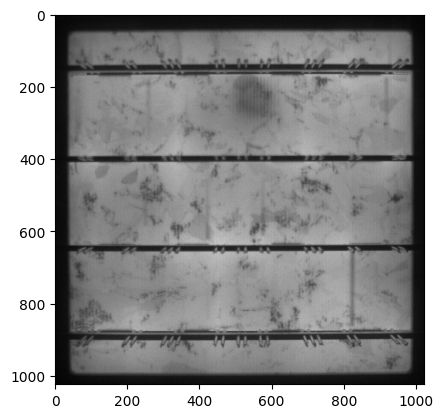

In [26]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pick_rand_num = random.randint(0,len(files_list))
# print(pick_rand_num)
img= f"/content/solar_cell_EL_image/PVELAD/EL2021/trainval/JPEGImages/img{pick_rand_num:06d}.jpg"
ann = f"/content/solar_cell_EL_image/PVELAD/EL2021/trainval/Annotations/img{pick_rand_num:06d}.xml"

print(img)
print(ann)

!cat $ann

image = mpimg.imread(img)
plt.imshow(image)

In [54]:
import xml.etree.ElementTree as ET
def get_annotation(xml_file:str)-> list:
  tree = ET.parse(xml_file)
  root = tree.getroot()
  annotations = []
  object_count = int(len(root.findall("object")))
  for obj in range(object_count):
    objs = dict()
    objs[f"name"] = root.findall("object")[obj].find("name").text
    objs[f"xmin"] = int(root.findall("object")[obj].find("bndbox").find("xmin").text)
    objs[f"ymin"] = int(root.findall("object")[obj].find("bndbox").find("ymin").text)
    objs[f"xmax"] = int(root.findall("object")[obj].find("bndbox").find("xmax").text)
    objs[f"ymax"] = int(root.findall("object")[obj].find("bndbox").find("ymax").text)
    annotations.append(objs)

  return annotations

In [71]:
ans= get_annotation('/content/solar_cell_EL_image/PVELAD/EL2021/trainval/Annotations/img002562.xml')
ans

[{'name': 'thick_line', 'xmin': 484, 'ymin': 170, 'xmax': 620, 'ymax': 293},
 {'name': 'finger', 'xmin': 814, 'ymin': 653, 'xmax': 830, 'ymax': 864}]

In [72]:
# from PIL import Image, ImageDraw, ImageFont
# def draw_bounding_box(image,annotations):

#   font = ImageFont.load_default()
#   draw = ImageDraw.Draw(image)

#   n_annotations = len(annotations)
#   for i in range(n_annotations):
#     name = annotations[i]['name']
#     xmin = annotations[i]['xmin']
#     ymin = annotations[i]['ymin']
#     xmax = annotations[i]['xmax']
#     ymax = annotations[i]['ymax']

#     box = (xmin,ymin,xmax,ymax)

#     draw.rectangle(box, outline="red", width=2)
#     draw.text((xmin,xmax), name)

#   image_annotated = mpimg.imread(image)
#   plt.imshow(image_annotated)

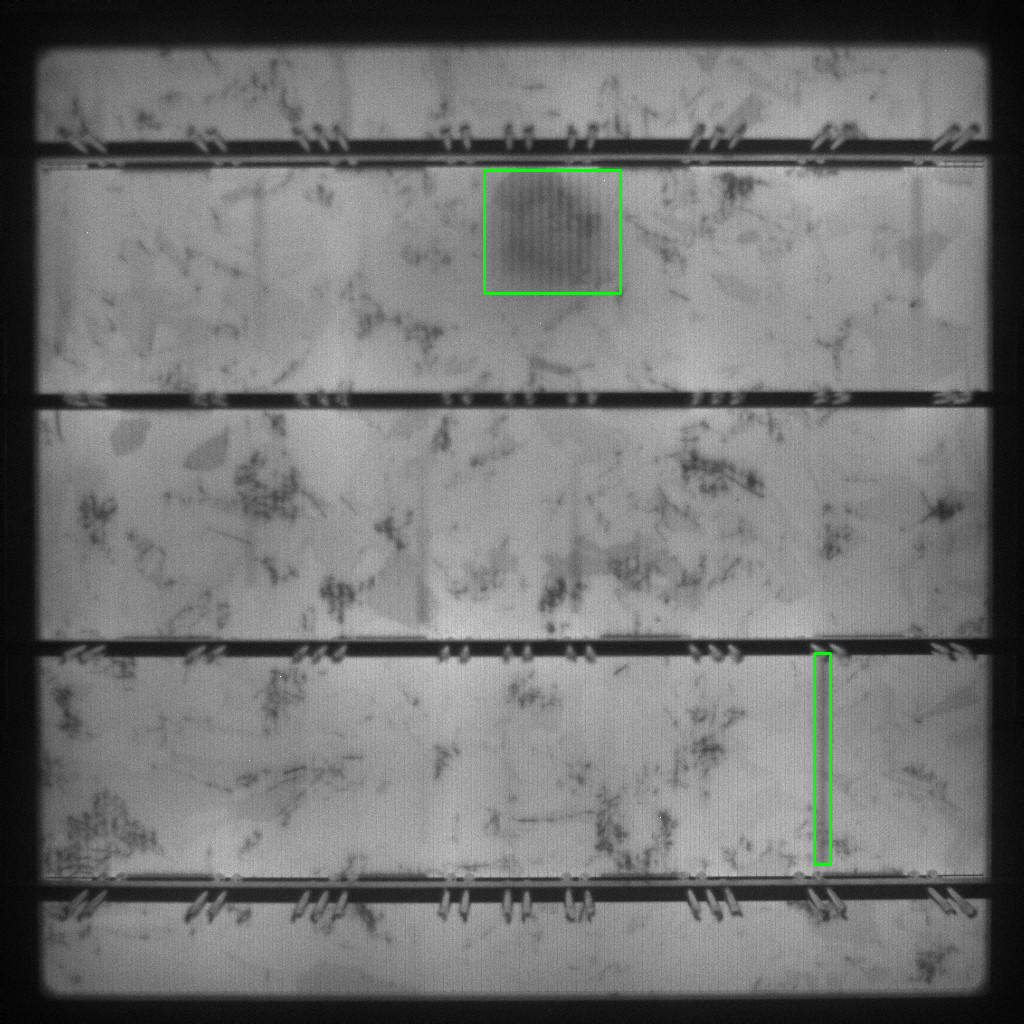

In [73]:
import cv2
def draw_bounding_box(image,annotations):
  img = cv2.imread(image)

  n_annotations = len(annotations)
  for i in range(n_annotations):
    name = annotations[i]['name']
    xmin = annotations[i]['xmin']
    ymin = annotations[i]['ymin']
    xmax = annotations[i]['xmax']
    ymax = annotations[i]['ymax']
    img_with_bounding_box = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,255,0),2)

  try:
    from google.colab.patches import cv2_imshow
  except:
    pass

  cv2_imshow(img_with_bounding_box)

draw_bounding_box(img,annotations=ans)